In [2]:
import pandas as pd

In [11]:
kmeans = pd.read_json('./result_amazon/clustering_amazon.json').T

In [12]:
kmedoids = pd.read_json('./result_amazon/clustering_amazon_kmedoids.json').T

In [13]:
agg = pd.read_json('./result_amazon/clustering_amazon_agg.json').T

In [14]:
import numpy as np

def evaluation_clus(data):
    sums = []
    for x in range(len(data)):
        sums.append(data['score_clus'][x][0])

    sumc = []
    for x in range(len(data)):
        sumc.append(data['score_clus'][x][1])

    sumd = []
    for x in range(len(data)):
        sumd.append(data['score_clus'][x][2])
    
    return np.mean(sums), np.mean(sumc), np.mean(sumd)

In [15]:
s, c, d = evaluation_clus(kmeans)
print(s, c, d)

0.4831652461640482 44.46311115751934 38.1002323973513


In [16]:
s, c, d = evaluation_clus(agg)
print(s, c, d)

0.4788350430526619 44.39171239315346 35.77969353649478


In [17]:
s, c, d = evaluation_clus(kmedoids)
print(s, c, d)

0.4666514766861065 46.70190037428008 32.094259866340415


In [271]:
#agg
sum_shilloutte, sum_chi, sum_dbi

(0.454907149875, 29.449460439023994, 0.7491771261393334)

In [276]:
#kmean
sum_shilloutte, sum_chi, sum_dbi

(0.454907149875, 29.449460439023994, 0.7491771261393334)

In [10]:
len(kmedoids)

300

In [10]:
checkkmedoids = []
for x in range(len(kmedoids)):
    checkkmedoids.append(list(zip(kmedoids['text'][x],kmedoids['cluster'][x])))

In [41]:
checkkmeans = []
for x in range(len(kmeans)):
    checkkmeans.append(list(zip(kmeans['text'][x],kmeans['cluster'][x])))

In [8]:
dfmedoids = pd.DataFrame(checkkmedoids[27], columns=['sentence','cluster'])

NameError: name 'checkkmedoids' is not defined

In [14]:
dfmedoids.to_excel('./dfmedoids2.xlsx')

In [42]:
dfmeans = pd.DataFrame(checkkmeans[295], columns=['sentence','cluster'])

In [43]:
dfmeans

,sentence,cluster
0,selain berolahraga atau sekedar menikmati sega...,1
1,hampir setiap pohon besar diberikan papan info...,1
2,pengunjung harus berhati hati saat bertemu den...,0
3,saran untuk pengelola agar tempat sampah seger...,0
4,dilokasi ini juga terdapat dua gua buatan peni...,4
5,kami hanya memasuki gua belanda yang awalnya d...,4
6,sirkulasi udara didalam gua sangat baik sejuk ...,1
7,akan lebih baik bila diberikan penerangan sert...,1
8,bila kembali ke tempat ini kami berencana untu...,0
9,banyak lokasi yang bisa dikunjungi di tempat i...,0


In [44]:
dfmeans.to_excel('./dfmeans4.xlsx')

In [13]:
checkagg = []
for x in range(len(kmeans)):
    checkagg.append(list(zip(agg['text'][x],agg['cluster'][x])))

In [116]:
dfagg = pd.DataFrame(checkagg[27], columns=['sentence','cluster'])

In [15]:
dfagg.to_excel('./dfagg3.xlsx')

In [16]:
dfagg

,sentence,cluster
0,Pengunjung dapat menikmati udara segar,0
1,belajar tentang kekayaan flora dan fauna di sini,1
2,berhati-hati saat bertemu monyet,0
3,dan melihat gua buatan Belanda dan Jepang,2
4,Saran untuk pengelola agar tempat sampah seger...,0
5,Taman Hutan Raya Juanda adalah tempat berpetua...,1
6,Di sini ada 2 gua (Belanda & Jepang) plus curu...,1
7,Untuk bisa menjelajah sebaiknya membawa alas k...,0
8,Taman Hutan Raya Dago,1
9,Bandung adalah tempat yang baik untuk melepas ...,1


In [17]:
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
model = BertModel.from_pretrained('indobenchmark/indobert-base-p1', output_hidden_states = True)

c:\Users\nar\miniconda3\envs\dep\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
import numpy as np
import torch
from tqdm import tqdm

use_gpu = False # Use GPU for text vectorization
n_combined_hidden_states = 2 # Number of last hidden states for combining to single vector
pooling_mode = 1 # pooling strategy for BERT-embeddings

if use_gpu:
    model.to('cuda')

def sentence2bert_hidden_states(sentence, tokenizer, model, use_gpu = True):
    indexed_tokens = tokenizer.encode(sentence)
    tokens_tensor = torch.tensor([indexed_tokens])
    if use_gpu:
        tokens_tensor = tokens_tensor.to('cuda')
    with torch.no_grad():
        outputs = model(tokens_tensor)        
    hidden_states = outputs[2]
    hidden_states = torch.stack(hidden_states, dim=0)
    hidden_states = torch.squeeze(hidden_states, dim=1)
    hidden_states = hidden_states.permute(1,0,2)    
    return hidden_states, indexed_tokens

def combine_hidden_states(hidden_states, n_summands):
    n = hidden_states.shape[0]    
    assert n_summands <= hidden_states.shape[1]    
    combined = np.empty((hidden_states.shape[0],hidden_states.shape[2]))
    for i in range(n):
        combined[i,:] = torch.sum(hidden_states[i][-n_summands:], dim=0).cpu()[:]
    return combined

def sentence2token_embeddings(sentence, tokenizer, model, use_gpu = True, n_combined_hidden_states = 4):
    hidden_states, indexed_tokens = sentence2bert_hidden_states(sentence, tokenizer, model, use_gpu)
    token_embeddings = combine_hidden_states(hidden_states, n_combined_hidden_states)
    return token_embeddings, indexed_tokens

# Sentence vectorization
def sentence2embedding(sentence, tokenizer, model, use_gpu = True, n_combined_hidden_states = 4, pooling_mode = 0):
    token_embeddings, indexed_tokens = sentence2token_embeddings(sentence, tokenizer, model, use_gpu, n_combined_hidden_states)
    if pooling_mode == 0:
        return token_embeddings[0]
    else:
        return np.mean(token_embeddings, axis = 0)

# Splitting text into sentences and sentence by sentence vectorization
def text2sentence_embeddings(text_sentences, tokenizer, model, use_gpu = True, n_combined_hidden_states = 2, pooling_mode = 0):
    n_text_sentences = len(text_sentences)
    text_embeddings = np.empty((n_text_sentences, model.config.hidden_size))
    for i in tqdm(range(n_text_sentences)):
        text_embeddings[i,:] = sentence2embedding(text_sentences[i], tokenizer, model, use_gpu, n_combined_hidden_states, pooling_mode)[:]
    return text_sentences, text_embeddings

In [19]:
def sentence_embeddings(data):
  text_sentences, text_embeddings = text2sentence_embeddings(data, 
                                                            tokenizer, 
                                                            model, 
                                                            use_gpu, 
                                                            n_combined_hidden_states, 
                                                            pooling_mode)
  return text_sentences, text_embeddings

In [20]:
_,embmedoids = sentence_embeddings(kmedoids['text'][27])

100%|██████████| 23/23 [00:01<00:00, 18.04it/s]


In [21]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
embmedoids = pca.fit_transform(embmedoids)

In [22]:
import numpy as np

labels_medoids = np.array(kmedoids['cluster'][27])

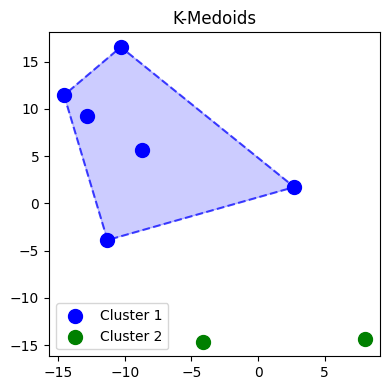

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import ConvexHull

def drawclusters(ax, x, y):
    for i in range(ncluster):
        points = x[y == i]
        ax.scatter(points[:, 0], points[:, 1], s=100, c=col[i], label=f'Cluster {i + 1}')
        if (len(points)) > 2:
            hull = ConvexHull(points)
            vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
            ax.plot(points[vert, 0], points[vert, 1], '--', alpha=0.7, c=col[i])
            ax.fill(points[vert, 0], points[vert, 1], c=col[i], alpha=0.2)

col = ['blue', 'green']
ncluster = 2
fig, ax = plt.subplots(1, figsize=(4, 4))
drawclusters(ax, embmedoids, labels_medoids)
ax.legend()
plt.title('K-Medoids')
plt.tight_layout()
plt.show()
fig.savefig('kmedoids.png', dpi=600)

In [50]:
from sklearn.decomposition import PCA
_,embd = sentence_embeddings(kmeans['text'][295])
pca = PCA(n_components=2)
embd = pca.fit_transform(embd)

100%|██████████| 21/21 [00:01<00:00, 18.58it/s]


In [51]:
kmeans['text'][295]

['selain berolahraga atau sekedar menikmati segarnya udara pengunjung dapat belajar mengenai kekayaan flora fauna serta sejarah',
 'hampir setiap pohon besar diberikan papan informasi nama dan daerah asal tumbuhan tersebut',
 'pengunjung harus berhati hati saat bertemu dengan kawanan monyet buntut panjang abu abu mereka akan mengikuti bila kita membawa makanan atau membongkar tempat sampah untuk mendapatkan sisa makanan',
 'saran untuk pengelola agar tempat sampah segera dikosongkan saat para pedagang makanan minuman selesai berjualan',
 'dilokasi ini juga terdapat dua gua buatan peninggalan perang yang dibangun oleh belanda dan jepang',
 'kami hanya memasuki gua belanda yang awalnya dibangun sebagai saluran air',
 'sirkulasi udara didalam gua sangat baik sejuk tidak pengap',
 'akan lebih baik bila diberikan penerangan serta diorama didalamnya',
 'bila kembali ke tempat ini kami berencana untuk hiking sampai ke air terjun terdekat untuk kalian yang senang berpetualang ke dalam hutan ya

In [52]:
labels_db = np.array(kmeans['cluster'][295])
values, counts = np.unique(labels_db, return_counts=True)

IndexError: list index out of range

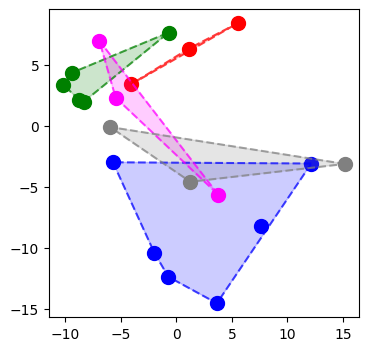

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import ConvexHull
# fig = plt.figure()
# ax = fig.add_subplot(111)

# scatter = ax.scatter(embmeans[:,0], embmeans[:,1], c=labels_, s=50)
# plt.show()
def drawclusters(ax, x, y):
    for i in range(ncluster):
        points = x[y == i]
        ax.scatter(points[:, 0], points[:, 1], s=100, c=col[i], label=f'Cluster {i + 1}')
        if (len(points)) > 2:
            hull = ConvexHull(points)
            vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
            ax.plot(points[vert, 0], points[vert, 1], '--', alpha=0.7, c=col[i])
            ax.fill(points[vert, 0], points[vert, 1], c=col[i], alpha=0.2)

col = ['blue', 'green', 'red', 'magenta', 'grey']
ncluster = len(values)
fig, ax = plt.subplots(1, figsize=(4, 4))
drawclusters(ax, embd, labels_db)
ax.legend(loc='upper left')
plt.title('DBSCAN')
plt.tight_layout()
plt.show()
fig.savefig('dbscan.png', dpi=600)

In [54]:
_,embagg = sentence_embeddings(agg['text'][295])

100%|██████████| 21/21 [00:01<00:00, 19.42it/s]


In [55]:
pca = PCA(n_components=2)
embagg = pca.fit_transform(embagg)

In [56]:
labels_agg = np.array(agg['cluster'][295])
values, counts = np.unique(labels_agg, return_counts=True)

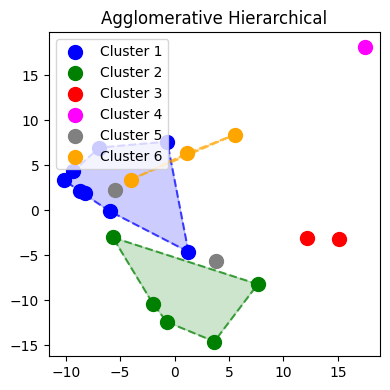

In [57]:
col = ['blue', 'green', 'red', 'magenta', 'grey', 'orange']
ncluster = len(values)
fig, ax = plt.subplots(1, figsize=(4, 4))
drawclusters(ax, embagg, labels_agg)
ax.legend(loc='upper left')
plt.title('Agglomerative Hierarchical')
plt.tight_layout()
plt.show()
fig.savefig('agg.png', dpi=600)

In [85]:
em = []
for u in range(len(agg)):
    _,embagg = sentence_embeddings(agg['text'][u])
    em.append(embagg)

100%|██████████| 36/36 [00:02<00:00, 15.16it/s]


In [86]:
len(em)

300

In [87]:
labels_agg = np.array(agg['cluster'])

In [88]:
from sklearn.metrics import davies_bouldin_score

In [89]:
from sklearn.decomposition import PCA
from sklearn import metrics

score = []

for e in range(len(em)):
    pca = PCA(n_components=2)
    emx = pca.fit_transform(em[e])
    score.append(metrics.calinski_harabasz_score(emx, labels_agg[e]))
    

In [90]:
scorex = np.mean(score)

In [91]:
scorex #agg

22.29649908782996

In [77]:
scorex

19.746601079713514

In [ ]:
data_pd = pd.DataFrame()

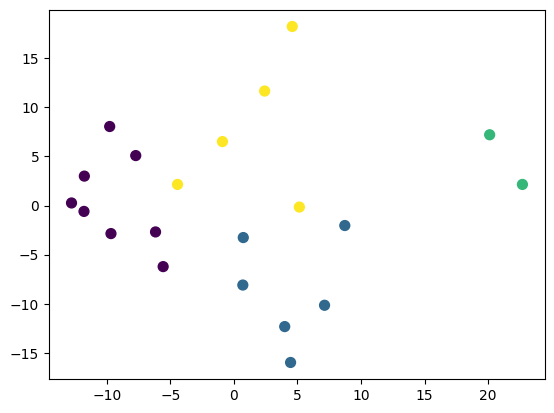

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(embagg[:,0], embagg[:,1], c=labels_agg, s=50)
plt.show()

In [34]:
agg['score_clus'][7]

[0.4849213473, 304.4393886804, 0.0700067459]

In [35]:
kmeans['score_clus'][7]

[0.4852407856, 293.735512511, 0.070010377]

In [36]:
kmedoids['score_clus'][7]

[0.38626511680000003, 497.867607775, 0.1200608809]